# Sales EDA

In [2]:
import numpy as np
import pandas as pd
import re
import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# load files
files = []

for dirname,_,filenames in os.walk('./training/SalesAnalysis/'):
    for filename in filenames:
        if re.findall('2019',filename) and filename.endswith('.csv'):
            files.append(os.path.join(dirname,filename))
#
## create df
sales = pd.DataFrame()
for file in files:
    frame = pd.read_csv(file)
    sales = pd.concat([sales,frame])
#
print(f'DataFrame Details\n\nTotal Rows: {sales.shape[0]}\nTotal Columns: {sales.shape[1]}')
sales.head()

DataFrame Details

Total Rows: 186850
Total Columns: 6


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# remove NaN
null = sales[sales.isnull().any(axis=1)]
sales = sales.drop(null.index)

sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
# remove hearder names from dataset
sales[sales['Order ID'].str.contains('^O',regex=True)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
9954,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
# add '_' to column names
sales.columns = [col.replace(' ','_') for col in sales.columns]

headers = sales[sales['Order_ID'].str.contains('^O')]
sales = sales.drop(headers.index).reset_index(drop=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177815 entries, 0 to 177814
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          177815 non-null  object
 1   Product           177815 non-null  object
 2   Quantity_Ordered  177815 non-null  object
 3   Price_Each        177815 non-null  object
 4   Order_Date        177815 non-null  object
 5   Purchase_Address  177815 non-null  object
dtypes: object(6)
memory usage: 8.1+ MB


In [7]:
# dtype conversions
sales['Quantity_Ordered'] = pd.to_numeric(sales['Quantity_Ordered'])
sales['Price_Each'] = pd.to_numeric(sales['Price_Each'])
sales['Order_Date'] = pd.to_datetime(sales['Order_Date'])

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177815 entries, 0 to 177814
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          177815 non-null  object        
 1   Product           177815 non-null  object        
 2   Quantity_Ordered  177815 non-null  int64         
 3   Price_Each        177815 non-null  float64       
 4   Order_Date        177815 non-null  datetime64[ns]
 5   Purchase_Address  177815 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 8.1+ MB


In [8]:
# calculate order spend
sales['Order_Spend'] = sales['Quantity_Ordered'] * sales['Price_Each']

# get month and day
sales['Month'] = sales['Order_Date'].dt.month
sales['Day'] = sales['Order_Date'].dt.day

# get city and state
def city(col):
    return col.split(',')[1]

def state(col):
    return col.split(',')[2].split(' ')[1]

sales['City'] = sales['Purchase_Address'].apply(lambda x: city(x)+' '+state(x))
sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Spend,Month,Day,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,19,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,7,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,12,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,12,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,30,Los Angeles CA


In [9]:
# show Order total
sales['Order_Total'] = sales.groupby(['Order_ID'])['Order_Spend'].transform('sum')

sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Spend,Month,Day,City,Order_Total
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,19,Dallas TX,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,7,Boston MA,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,12,Los Angeles CA,611.99
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,12,Los Angeles CA,611.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,30,Los Angeles CA,11.99


#### Show monthly revenue

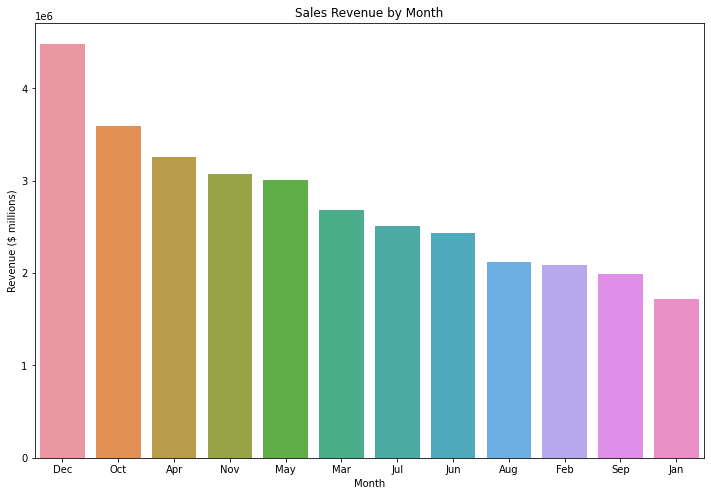

,4,11,0,10,1,7,8,9,2,6,3,5
month,Dec,Oct,Apr,Nov,May,Mar,Jul,Jun,Aug,Feb,Sep,Jan
revenue,"4,483,195.97","3,592,781.52","3,252,081.12","3,067,463.05","3,010,315.13","2,678,969.22","2,509,243.23","2,436,539.61","2,114,102.03","2,089,066.70","1,993,594.59","1,718,766.59"


In [23]:
mth = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
sales['Month'] = sales['Order_Date'].dt.month
sales['Month'] = sales['Month'].map(mth)

months = list(sales['Month'].unique())
mth_rev = []

for i in range(len(months)):
    x = sales[sales['Month'] == months[i]]
    r = x['Order_Spend'].sum()
    mth_rev.append(np.round(r,2))
#
data = pd.DataFrame({'month':months,'revenue':mth_rev})
data = data.sort_values('revenue',ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(data=data,x='month',y='revenue')
plt.ylabel('Revenue ($ millions)')
plt.xlabel('Month')
plt.title('Sales Revenue by Month',)
plt.show()

display(data.T)

#### Show city revenue

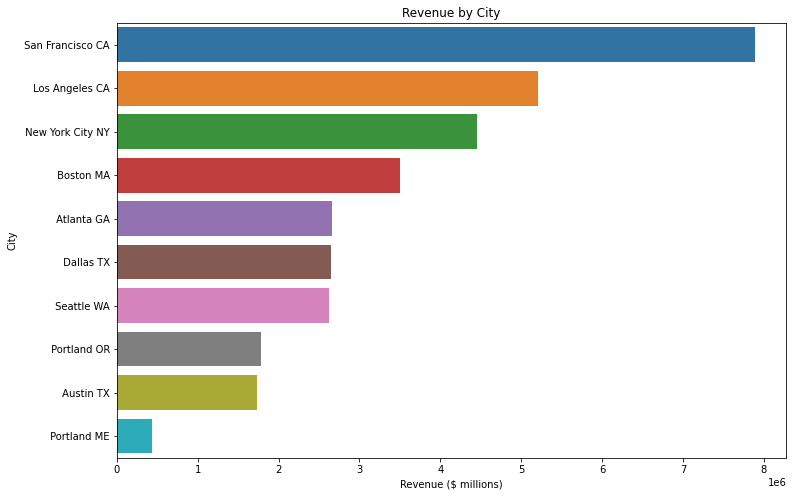

In [53]:
cities = list(sales.City.unique())
city_rev = []

for i in range(len(cities)):
    x = sales[sales.City == cities[i]]
    r = x['Order_Spend'].sum()
    city_rev.append(np.round(r,2))
#
data = pd.DataFrame({'city':cities,'revenue':city_rev})
data = data.sort_values('revenue',ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(data=data,x='revenue',y='city')
plt.title('Revenue by City')
plt.xlabel('Revenue ($ millions)')
plt.ylabel('City')
plt.show()

#### Show top 10 orders (by spend)

In [41]:
top10 = sales.groupby(['Order_ID'])['Order_Spend'].sum().sort_values(ascending=False).to_frame().reset_index()[:10]
print(top10)

  Order_ID  Order_Spend
0   181069     3,779.99
1   200528     3,400.00
2   202212     3,400.00
3   210292     3,400.00
4   255318     3,400.00
5   181544     3,400.00
6   261683     2,699.99
7   188087     2,699.99
8   177182     2,699.99
9   189207     2,699.99


#### Show products most frequently purchased together

In [59]:
duplicates = sales[sales.duplicated(subset='Order_ID',keep=False)]

duplicates['Grouped'] = duplicates.groupby(['Order_ID'])['Product'].transform(lambda x: ', '.join(x))

duplicates.drop_duplicates(subset='Order_ID',keep='first',inplace=True)

duplicates.drop(['Product'],axis=1,inplace=True)

grouped = duplicates[['Order_ID','Grouped']]

<ipython-input-59-ca5042354358>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates['Grouped'] = duplicates.groupby(['Order_ID'])['Product'].transform(lambda x: ', '.join(x))
<ipython-input-59-ca5042354358>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates.drop_duplicates(subset='Order_ID',keep='first',inplace=True)
C:\Users\uran5\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [65]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in grouped['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list,2)))
#
for key, val in count.most_common(10):
    print(key,val)

('Google Phone', 'USB-C Charging Cable') 915
('iPhone', 'Lightning Charging Cable') 913
('iPhone', 'Wired Headphones') 414
('Google Phone', 'Wired Headphones') 377
('Vareebadd Phone', 'USB-C Charging Cable') 331
('iPhone', 'Apple Airpods Headphones') 328
('Google Phone', 'Bose SoundSport Headphones') 209
('USB-C Charging Cable', 'Wired Headphones') 147
('Vareebadd Phone', 'Wired Headphones') 131
('Lightning Charging Cable', 'Wired Headphones') 87
